# 19절. SymPy로 공부하는 미분과 적분

## 변수와 함수

- 변수 : 어떤 숫자를 대표하는 기호
- 함수 :  수식등을 사용하여 입력받은 변수를 다른 값 즉, 출력 변수로 바꾸어 출력하는 관계(relationship) 혹은 구조
- 역함수(inverse function) : 입력과 출력 관계와 정반대의 입출력 관계를 가지는 함수

## 함수의 그래프

$f(x) = x^3 - 3x^2 + x$

In [2]:
import numpy as np

In [14]:
def f(x):
    return x**3 - 3*x**2 + x

In [15]:
x = np.linspace(-1, 3, 9)

x 는 -1 부터 3까지 0.5 간격으로 9개의 점을 찍음

In [16]:
y = f(x)
y

array([-5.   , -1.375,  0.   , -0.125, -1.   , -1.875, -2.   , -0.625,  3.   ])

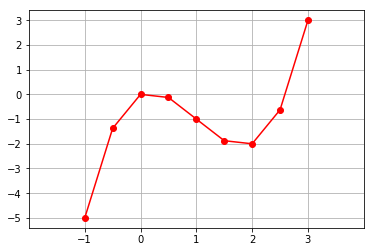

In [17]:
import matplotlib.pylab as plt

plt.plot(x, y, 'ro-')

plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-5, 4))

plt.grid()
plt.show()

좀 더 조일하게 만들면 곡선이 된다. 

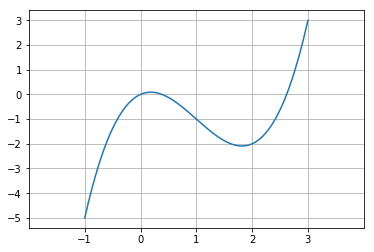

In [18]:
x = np.linspace(-1, 3, 400)
y = f(x)
plt.plot(x, y)

plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-5, 4))

plt.grid()
plt.show()

## 기울기

입력변수의 변화에 따른 출력변수의 변화를 비율

$\text{기울기} =  \dfrac{\text{접선이 $y$ 방향으로 이동한 거리}}{\text{접선이 $x$ 방향으로 이동한 거리}}$


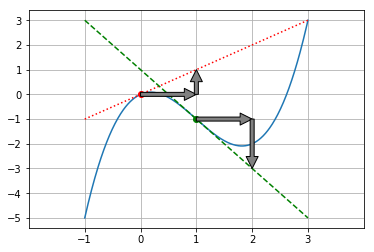

In [19]:
plt.plot(x, y)
plt.plot(0, 0, 'ro'); plt.plot(x, x, 'r:')
plt.plot(1, -1, 'go'); plt.plot(x, (3*1**2-6*1+1)*(x-1)-1, 'g--')

plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-5, 4))

plt.annotate('', xy=(1, 0), xytext=(0, 0), arrowprops=dict(facecolor='gray'))
plt.annotate('', xy=(1, 1), xytext=(1, 0), arrowprops=dict(facecolor='gray'))

plt.annotate('', xy=(2, -1), xytext=(1, -1), arrowprops=dict(facecolor='gray'))
plt.annotate('', xy=(2, -3), xytext=(2, -1), arrowprops=dict(facecolor='gray'))

plt.grid()
plt.show()

## 데이터 분석에서 많이 사용되는 함수들


### 다항식 함수
수항  c0 , 일차항  c1x , 이차항  c2x2 ,  ⋯⋯  등의 거듭제곱 항의 합으로 이루어진 함수

### 지수 함수
밑(base)를 오일러 수  ee (약 2.718)로 하는 지수 함수 <br>
$y = e^x$ <br>
$y = \exp x$

* 특성 
    - 양수를 거듭제곱한 값이므로 음수가 될 수 없다.
    - x=0x=0 일 때 1이 된다.
    - xx 가 양의 무한대로 가면( x→∞ x→∞ ), 양의 무한대로 다가간다.
    - xx 가 음의 무한대로 가면( x→−∞ x→−∞ ), 0으로 다가간다.
    
  밑이  e 가 아닌 경우에는 다음과 같이 변형하여 사용

In [20]:
np.e

2.718281828459045

In [22]:
def f_exp(x):
    return np.e ** x

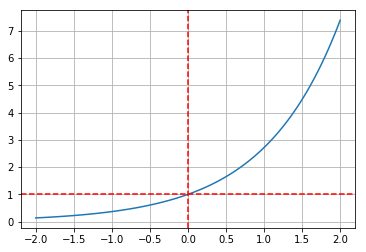

In [24]:
xx = np.linspace(-2, 2, 100)
yy = f_exp(xx)
plt.plot(xx, yy)
plt.axhline(1, c='r', ls="--")
plt.axvline(0, c='r', ls="--")
plt.grid()
plt.show()

## 로그 함수

지수 함수의 역함수: 자연로그(natural log) 함수

$y = \log x$

* 특징 
    - x 값, 즉 입력변수값이 양수이어야 한다. 0이거나 음수이면 정의되지 않는다.
    - x>1  이면 양수가 된다.
    - x=1 일 때  y=0 이 된다.
    - x<1  이면 음수가 된다.

In [25]:
def f_log(x):
    return np.log(x)

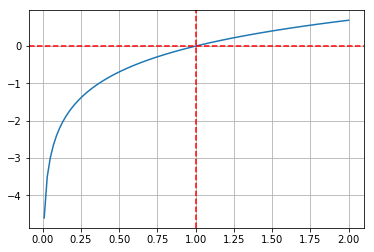

In [26]:
xx = np.linspace(0.01, 2, 100)
yy = f_log(xx)
plt.plot(xx, yy)
plt.axhline(0, c='r', ls="--")
plt.axvline(1, c='r', ls="--")
plt.grid()
plt.show()

### 로그 함수의 성질 1: 로그 함수는 곱하기를 더하기로 변환
### 로그 함수의 성질 2: 로그 함수를 적용해도 함수의 최고점, 최저점의 위치는 변하지 않음


In [30]:
def ff(x):
    return x**3 - 12*x + 20 * np.sin(x) + 7

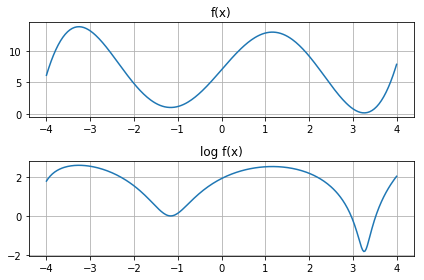

In [32]:
xx = np.linspace(-4, 4, 300)
yy = ff(xx)

plt.subplot(211)
plt.plot(xx, yy)
plt.title("f(x)")
plt.grid()

plt.subplot(212)
plt.plot(xx, np.log(yy))
plt.title("log f(x)")

plt.tight_layout()
plt.grid()
plt.show()

### 로그 함수의 성질 3: 로그 함수는 0부터 1사이의 작은 값을 확대시켜 보여줌

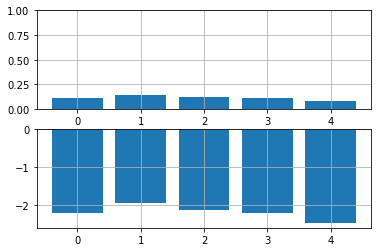

In [33]:
np.random.seed(0)
x = np.random.rand(5) * 0.2

plt.subplot(211)
plt.bar(range(5), x)
plt.ylim(0, 1)
plt.grid()

plt.subplot(212)
plt.bar(range(5), np.log(x))
plt.grid()

plt.show()

# SymPy를 사용한 함수 미분

## 미분 
원래 함수의 기울기(slope) = 도함수(derivative)

## 미분 공식

### 기본 미분 공식

* 상수
    - 상수를 미분하면 0이 된다.

* 거듭제곱
    - x 의  n  제곱을 미분하면  n−1  제곱으로 제곱수가 1씩 감소한다. 이 공식은  n 이 자연수이거나 음의 정수일 때 성립한다.  n=0 일 때는 성립하지 않는다.

* 로그
    - 로그함수를 미분하면  $x^{-1}$ 이 된다.

* 지수
    - 밑이 오일러 수인 지수함수는 미분해도 변하지 않는다.
     
### 선형 조합

어떤 함수에 각각 상수를 곱한 후 더한 값(선형 조합)은 각 함수의 도함수를 선형 조합한 것과 같다.


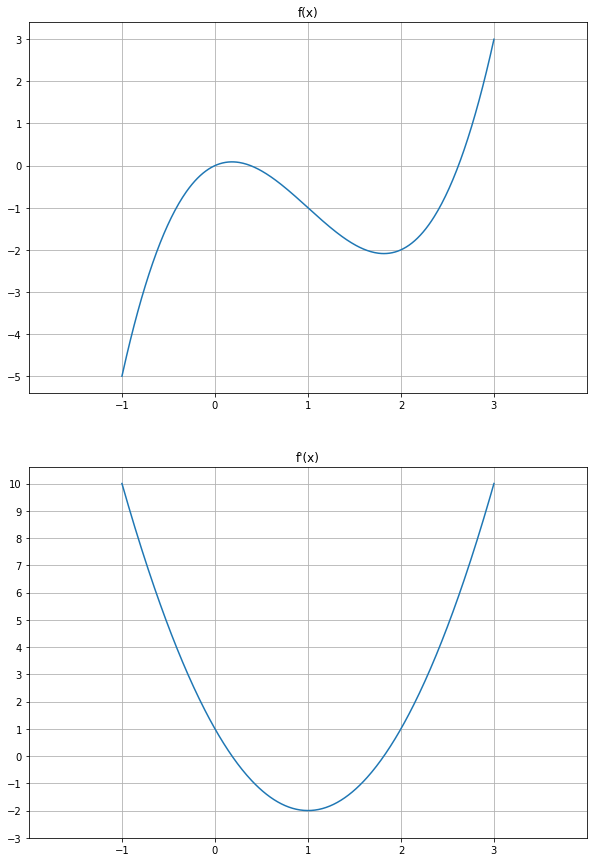

In [34]:
def f(x):
    return x**3 - 3*x**2 + x

def fprime(x):
    return 3*x**2 - 6*x + 1

x = np.linspace(-1, 3, 400)

plt.figure(figsize=(10,15))

plt.subplot(211)
plt.plot(x, f(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-5, 4))
plt.title('f(x)')
plt.grid()

plt.subplot(212)
plt.plot(x, fprime(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-3, 11))
plt.title("f'(x)")
plt.grid()

plt.show()

### 곱셈 법칙

각 개별 함수의 도함수를 더한 값과 같다. 

$f = x \cdot \exp(x)$ -->  $\dfrac{df}{dx} = \exp(x) + x \exp(x)$ 


### 연쇄 법칙

미분하고자 하는 함수의 입력 변수가 다른 함수의 출력 변수인 경우 적용

$f = \exp \dfrac{(x-\mu)^2}{\sigma^2}$

함수를 나누면 

$f = \exp(z) \;,\;\;\;\; z = \dfrac{y^2}{\sigma^2}   \;,\;\;\;\;   y = x-\mu$

연쇄 법칙을 적용하면 

$\dfrac{df}{dx} = \dfrac{df}{dz} \cdot \dfrac{dz}{dy} \cdot \dfrac{dy}{dx}$

결과   

$\dfrac{df}{dx} =  \dfrac{2(x-\mu)}{\sigma^2} \exp \dfrac{(x-\mu)^2}{\sigma^2}$ 

## 2차 도함수

도함수를 한 번 더 미분하여 만들어진 함수를 2차 도함수(second derivative)

2차 도함수 값이 양수인 경우를 볼록(convex) <br>
2차 도함수 값이 음수인 경우를 오목(concave)


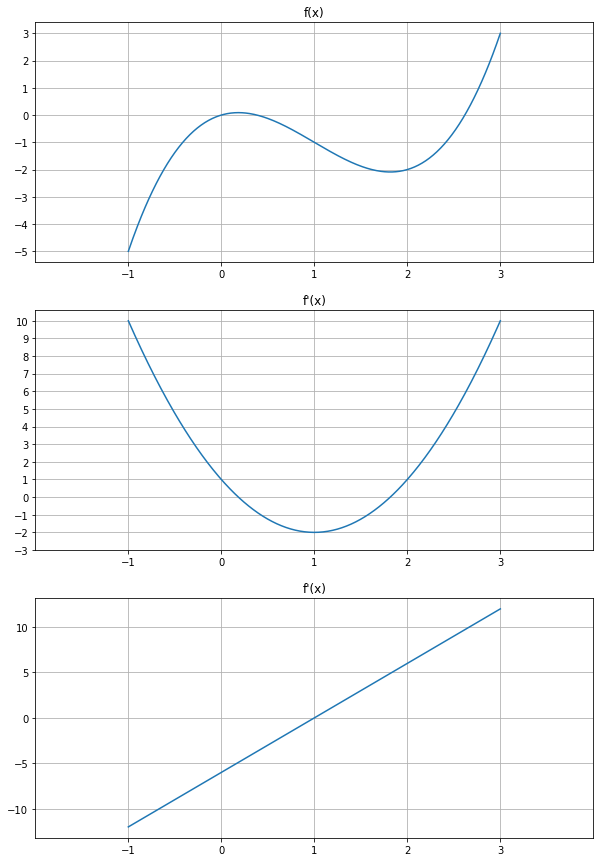

In [36]:
def f(x):
    return x**3 - 3*x**2 + x

def fprime(x):
    return 3*x**2 - 6*x + 1

def fprime2(x):
    return 6*x - 6

x = np.linspace(-1, 3, 400)

plt.figure(figsize=(10,15))

plt.subplot(311)
plt.plot(x, f(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-5, 4))
plt.title('f(x)')
plt.grid()

plt.subplot(312)
plt.plot(x, fprime(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-3, 11))
plt.title("f'(x)")
plt.grid()

plt.subplot(313)
plt.plot(x, fprime2(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.title("f'(x)")
plt.grid()

plt.show()

## 편미분

다변수 함수인 경우에도 편미분의 결과로 하나의 함수에 대해 여러 개의 도함수가 나온다. <br>
변수가 하나인 함수의 미분과 같음

$f(x,y) = x^2 + 4xy + 4y^2$

x 에 대해서 미분한값

$f_x(x,y) = \dfrac{\partial f}{\partial x} = 2x + 4y$ 

y 에 대해서 미분한값

$f_y(x,y) = \dfrac{\partial f}{\partial y} = 4x + 8y$


## SymPy

사람이 연필로 계산하는 미분/적분과 동일한 형태의 연산



In [37]:
import sympy

# Juypter 노트북에서 수학식의 LaTeX 표현을 위해 필요함
sympy.init_printing(use_latex='mathjax')  

In [38]:
x = sympy.symbols('x')
x

x

In [39]:
type(x)

sympy.core.symbol.Symbol

In [40]:
f = x * sympy.exp(x)
f

   x
x⋅ℯ 

미분 

In [41]:
sympy.diff(f)

   x    x
x⋅ℯ  + ℯ 

소인수분해

In [43]:
sympy.simplify(sympy.diff(f))

         x
(x + 1)⋅ℯ 

In [45]:
x, y = sympy.symbols('x y')
f = x ** 2 + x * y + y ** 2
f

 2          2
x  + x⋅y + y 

In [46]:
sympy.diff(f, x)

2⋅x + y

In [47]:
sympy.diff(f, y)

x + 2⋅y

In [48]:
x, mu, sigma = sympy.symbols('x mu sigma')
f = sympy.exp((x-mu)**2/sigma**2)
f

         2
 (-μ + x) 
 ─────────
      2   
     σ    
ℯ         

In [49]:
sympy.diff(f, x)

                      2
              (-μ + x) 
              ─────────
                   2   
                  σ    
(-2⋅μ + 2⋅x)⋅ℯ         
───────────────────────
            2          
           σ           

In [50]:
sympy.simplify(sympy.diff(f,x))

                   2
            (μ - x) 
            ────────
                2   
               σ    
2⋅(-μ + x)⋅ℯ        
────────────────────
          2         
         σ          

# 적분 

## 부정적분

반-미분(anti-derivative) : 도함수  f(x) 를 보고 미분되기 전의 원래의 함수를 찾는 과정(integration), 또는 그 결과(integral)

integrate 명령

In [51]:
import sympy

sympy.init_printing(use_latex='mathjax')

In [52]:
x = sympy.symbols('x')
f = x * sympy.exp(x) + sympy.exp(x)
f

   x    x
x⋅ℯ  + ℯ 

In [53]:
sympy.integrate(f)

   x
x⋅ℯ 

In [54]:
x, y = sympy.symbols('x y')
f = 2 * x + y
f

2⋅x + y

In [55]:
sympy.integrate(f,x)

 2      
x  + x⋅y

### 정적분

독립변수 x 가 어떤 구간 [a,b]  사이일 때 그 구간에서 함수  f(x) 의 값고 수평선(x 축)이 이루는 면적

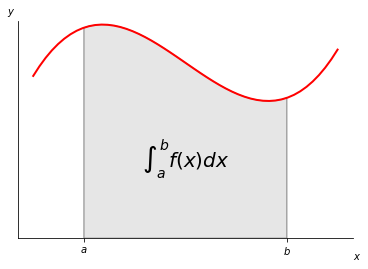

In [56]:
from matplotlib.patches import Polygon

def f(x):
    return x ** 3 - 3 * x ** 2 + x + 6

a, b = 0, 2

x = np.linspace(a - 0.5, b + 0.5, 50)
y = f(x)

ax = plt.subplot(111)

plt.plot(x, y, 'r', linewidth=2)
plt.ylim(ymin=0)

ix = np.linspace(a, b)
iy = f(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)

plt.text(0.5 * (a + b), 0.2 * (f(a) + f(b)), r"$\int_a^b f(x)dx$",
         horizontalalignment='center', fontsize=20)

plt.figtext(0.9, 0.05, '$x$')
plt.figtext(0.1, 0.9, '$y$')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')

ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([])

plt.show()

미적분학의 기본 정리(Fundamental Theorem of Calculus) : 대부분 부정적분으로 구한 함수 F(x) 를 이용하여 구함 

$\int_{b}^{a} f(x) dx = F(a) - F(b)$

In [58]:
x, y = sympy.symbols('x y')
f = x ** 3 - 3 * x ** 2 + x + 6
# 부정적분
F = sympy.integrate(f)

 4         2      
x     3   x       
── - x  + ── + 6⋅x
4         2       

In [59]:
# 2 ~ 0 까지 넓이
(F.subs(x, 2) - F.subs(x, 0)).evalf()

10.0000000000000

In [65]:
# 정적분
import scipy.integrate 

def f(x):
    return x ** 3 - 3 * x ** 2 + x + 6

scipy.integrate.quad(f, 0, 2)

(10.0, 1.1102230246251565e-13)

두번째 숫자는 오차의 상한값을

In [67]:
type(scipy.integrate)

module

In [69]:
type(scipy)

module

In [68]:
type(scipy.integrate.quad)

function

## 다변수 정적분

입력 변수가 2개인 2차원 함수

### 하나의 변수로 적분하는 경우

하나의 변수만 진짜 입력 변수로 보고 나머지 하나는 단순히 정해지지 않은 상수로 보는 방법


### 두 변수를 적분하는 경우
두 변수를 모두 적분하는 것은 다음과 같이 2차원 평면에서 사각형 영역안의 부피를 구하는 것과 같다.

# 20절. 행렬의 미분


**행렬 미분** : 행렬을 입력이나 출력으로 가지는 함수를 미분하는 것 편미분(partial derivative)

분자 중심 표현법(Numerator-layout notation)과 분모 중심 표현법(Denominator-layout notation) 있음 (주로 분모 중심을 사용)

## 스칼라를 벡터로 미분하는 경우

종속 변수  y 가 스칼라 독립 변수  x 가 (다차원)벡터인 다변수 함수

그레디언트 벡터(gradient vector) : 
스칼라를 벡터로 미분하는 경우에는 결과를 열 벡터로 표시

$f(x, y) = 2x^2 + 6xy + 7y^2 - 26x - 54y + 107$

$\nabla f = 
\begin{bmatrix}
\dfrac{\partial f}{\partial x}\\
\dfrac{\partial f}{\partial y}\\
\end{bmatrix} =
\begin{bmatrix}
4x + 6y - 26\\
6x + 14y - 54\\
\end{bmatrix}$ 

2차원 상에서 컨투어(contour) 플롯

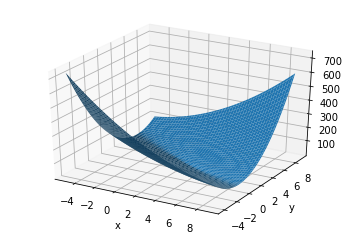

In [8]:
import numpy as np

def f(x, y):
    return 2 * x**2 + 6 * x * y + 7 * y**2 - 26 * x - 54 * y + 107

xx = np.linspace(-5, 9, 100)
yy = np.linspace(-4, 9, 100)
X, Y = np.meshgrid(xx, yy)

Z = f(X, Y)

import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
fig.gca(projection='3d').plot_surface(X, Y, Z)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

플롯을 퀴버(quiver) 플롯 : 그레디언트 벡터를 화살표로 표현

* 그레디언트 벡터의 방향은 함수 곡면의 기울기가 가장 큰 방향, 즉 단위 길이당 함수 값(높이)이 가장 크게 증가하는 방향을 가리킨다.
* 그레디언트 벡터의 크기는 기울기를 의미한다. 즉 벡터의 크기가 클 수록 함수 곡면의 기울기가 커진다.

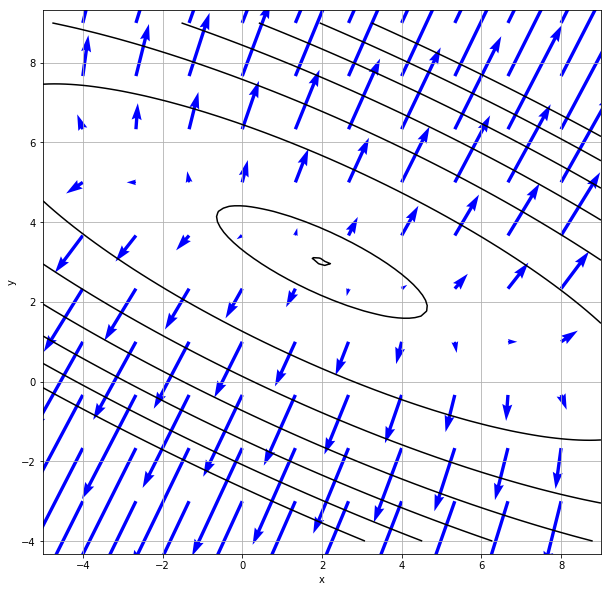

In [9]:
def gx(x, y):
    return 4 * x + 6 * y - 26

def gy(x, y):
    return 6 * x + 14 * y - 54

xx2 = np.linspace(-4, 8, 10)
yy2 = np.linspace(-3, 9, 10)
X2, Y2 = np.meshgrid(xx2, yy2)

GX = gx(X2, Y2)
GY = gy(X2, Y2)

plt.figure(figsize=(10,10))
plt.contour(X, Y, Z, levels=[0.05, 5, 50, 100, 150, 200, 250, 300], colors='k')
plt.quiver(X2, Y2, GX, GY, color='blue', scale=400)
plt.axis("equal")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

## 행렬 미분 법칙

다변수 함수를 미분 법칙

### 벡터 미분 규칙 1: 선형 모형

선형 모형을 미분하면 가중치 벡터가 된다.

### 벡터 미분 규칙 2: 이차 형식
이차 형식을 미분하면 행렬과 벡터의 곱으로 나타난다.

|스칼라 미분             |         벡터/행렬 미분       |
|:-----------------------:|:------------------------------:|
| $ax \;\; \rightarrow \;\; a$ | $w^Tx \;\; \rightarrow \;\; w$ |
| $ax^2 \;\; \rightarrow \;\; 2ax$ | $x^TAx \;\; \rightarrow \;\; (A+A^T)x$ |


## 벡터를 스칼라로 미분하는 경우

함수의 종속 변수  y 가 **(다차원)벡터**이고 독립 변수  x 가 **스칼라**인 경우 == 함수가 여러 개

==> 미분값도 여러개 

$\mathbf{y} =
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots\\
y_M \\
\end{bmatrix}
= \mathbf{f}(x)$

↓

$\frac{\partial \mathbf{y}}{\partial x} = \left[
\frac{\partial y_1}{\partial x}
\frac{\partial y_2}{\partial x}
\cdots
\frac{\partial y_M}{\partial x}
\right].$

## 벡터를 벡터로 미분하는 경우

자코비안 행렬(Jacobian matrix) : 도함수는 **행렬** 형태, (종속 변수와 독립 변수가 **모두 벡터(다차원)** 데이터인 경우, 독립 변수 각각과 종속 변수 각각의 조합에 대해 모두 미분이 존재)

$\mathbf J = \frac{d\mathbf y}{d\mathbf x} = \begin{bmatrix}
    \dfrac{\partial y_1}{\partial \mathbf x}^T \\ \cdots \\ \dfrac{\partial y_M}{\partial \mathbf x}^T \end{bmatrix}
= \begin{bmatrix}
    \dfrac{\partial y_1}{\partial x_1} & \cdots & \dfrac{\partial y_1}{\partial x_N}\\
    \vdots & \ddots & \vdots\\
    \dfrac{\partial y_M}{\partial x_1} & \cdots & \dfrac{\partial y_M}{\partial x_N} \end{bmatrix}$


## 스칼라를 행렬로 미분

종속 변수가 **스칼라** 값이고 독립 변수가 **행렬** 일때 -> 도함수 행렬의 모양이 독립 변수 **행렬**  X 와 같다.

2차 도함수 = 헤시안 행렬(Hessian matrix)

$H = \begin{bmatrix}
  \dfrac{\partial^2 f}{\partial x_1^2} & \dfrac{\partial^2 f}{\partial x_1\,\partial x_2} & \cdots & \dfrac{\partial^2 f}{\partial x_1\,\partial x_N} \\
  \dfrac{\partial^2 f}{\partial x_2\,\partial x_1} & \dfrac{\partial^2 f}{\partial x_2^2} & \cdots & \dfrac{\partial^2 f}{\partial x_2\,\partial x_N} \\
  \vdots & \vdots & \ddots & \vdots \\
  \dfrac{\partial^2 f}{\partial x_N\,\partial x_1} & \dfrac{\partial^2 f}{\partial x_N\,\partial x_2} & \cdots & \dfrac{\partial^2 f}{\partial x_N^2}
\end{bmatrix}$


### 행렬 미분 규칙 3: 행렬 곱의 대각성분
두 정방 행렬을 곱해서 만들어진 행렬의 대각성분(trace)는 스칼라<br>
이 스칼라를 곱셈의 뒤 행렬로 미분하면 앞의 행렬의 전치 행렬이 나온다.

$\dfrac{\partial \text{tr} (\mathbf{B}\mathbf{A})}{\partial \mathbf{A}} = \mathbf{B}^T$

### 행렬 미분 규칙 4: 행렬식의 로그

행렬식(determinant)는 스칼라이고 이 값의 로그 값도 스칼라<br>
이 값을 원래의 행렬로 미분하면 원래 행렬의 역행렬의 전치 행렬이 된다.

$\dfrac{\partial \log \det \mathbf{A} }{\partial \mathbf{A}} = (\mathbf{A}^{-1})^T$



# 21절. SciPy를 이용한 최적화

# 최적화 기초

모수를 입력으로 하고 예측 오차를 출력으로 하는 함수

이 함수를 최소화하는 모수를 찾는 문제를 최적화(optimization) 문제

## 최적화 문제
특정한 제한 조건(constraint)을 만족시키면서 함수  f 의 값을 최소화 하는 변수  x 의 값  x∗ 를 찾는 것

목적 함수(objective function) 또는 비용 함수(cost function), 손실 함수(loss function)


In [11]:
import numpy as np
import matplotlib.pylab as plt

In [12]:
def f1(x) : 
    return (x - 2) **2 +2

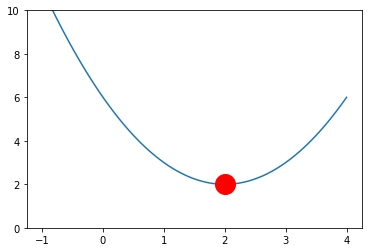

In [15]:
xx = np.linspace(-1, 4, 100)
plt.plot(xx, f1(xx))
plt.plot(2, 2, 'ro', markersize=20)
plt.ylim(0, 10)
plt.show()

In [16]:
def f2(x,y):
    return (1-x)**2 + 100.0 * (y-x**2)**2

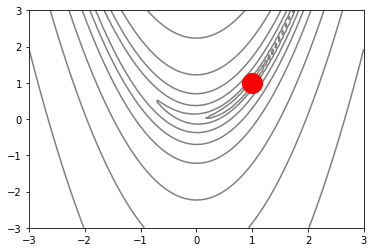

In [18]:
xx = np.linspace(-3, 3, 100)
yy = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(xx, yy)
Z = f2(X, Y)

plt.contour(X, Y, Z, colors="gray", levels=[0.7, 3, 15, 50, 150, 500, 1500, 5000])
plt.plot(1, 1, 'ro', markersize=20)
plt.show()

## 그리드 서치와 수치적 최적화

그리드 서치(grid search) 방법 : 가능한  xx 의 값을 여러개 넣어 보고 그 중 가장 작은 값을 선택

수치적 최적화 방법
* 어떤 위치  xk 를 시도한 뒤, 다음 번에 시도할 위치  k+1 을 찾는 알고리즘
* 현재 위치  xk 가 최적점인지 판단하는 알고리즘

## 기울기 필요 조건
현재 시도하고 있는 위치  x 가 최소점인지 아닌지 알아내는 알고리즘

값 x∗ 에서 함수의 기울기(slope) 값이 0 

## SGD(Steepest Gradient Descent) 방법

단순히 현재 위치에서의 기울기 값  g(x) 만을 이용하여 다음에 시도할 위치를 알아내는 방법

g(x) 값이 음수면 앞으로 양수면 뒤로 움직임 

스텝 사이즈(step size) == learning rate

In [20]:
def f1d(x):
    """derivative of f1(x)"""
    return 2 * (x - 2.0)

x = 0, g = -4.0
x = 1.6, g = -0.7999999999999998
x = 1.92, g = -0.16000000000000014


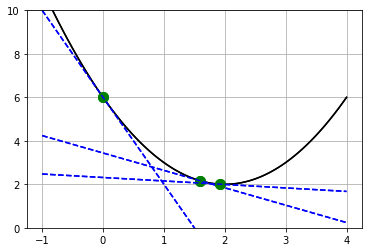

In [22]:
xx = np.linspace(-1, 4, 100)

plt.plot(xx, f1(xx), 'k-')

# step size
mu = 0.4

# k = 1
x = 0
plt.plot(x, f1(x), 'go', markersize=10)
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("x = {}, g = {}".format(x, f1d(x)))
      
# k = 2
x = x - mu * f1d(x)
plt.plot(x, f1(x), 'go', markersize=10)
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("x = {}, g = {}".format(x, f1d(x)))
      
# k = 3
x = x - mu * f1d(x)
plt.plot(x, f1(x), 'go', markersize=10)
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("x = {}, g = {}".format(x, f1d(x)))
      
plt.ylim(0, 10)
plt.grid()
plt.show()

이차원 함수x = -2 y = -2 에서 시작해서 SGD로 최적점을 찾아나가는 과정

In [23]:
def f2g(x, y):
    """gradient of f2(x)"""
    return np.array((2.0 * (x - 1) - 400.0 * x * (y - x**2), 200.0 * (y - x**2)))

x = (-2, -2), g = [-4806. -1200.]
x = (1.8448000000000002, -1.04), g = [ 3280.47997256  -888.657408  ]
x = (-0.77958397804544122, -0.32907407359999974), g = [-295.69275076 -187.36505049]


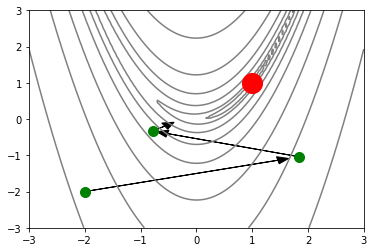

In [24]:
xx = np.linspace(-3, 3, 100)
yy = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(xx, yy)
Z = f2(X, Y)

plt.contour(X, Y, Z, colors="gray", levels=[0.7, 3, 15, 50, 150, 500, 1500, 5000])
plt.plot(1, 1, 'ro', markersize=20)

# step size
mu = 8e-4
s = 0.9  # for arrowr head drawing

# k = 1
x = -2
y = -2
g = f2g(x, y)
print("x = {}, g = {}".format((x,y), g))
plt.plot(x, y, 'go', markersize=10)
plt.arrow(x, y, -s * mu * g[0], -s * mu * g[1], head_width=0.2, head_length=0.2, fc='k', ec='k')

# k = 2
x = x - mu * g[0]
y = y - mu * g[1]
g = f2g(x, y)
print("x = {}, g = {}".format((x,y), g))
plt.plot(x, y, 'go', markersize=10)
plt.arrow(x, y, -s * mu * g[0], -s * mu * g[1], head_width=0.2, head_length=0.2, fc='k', ec='k')

# k = 3
x = x - mu * g[0]
y = y - mu * g[1]
g = f2g(x, y)
print("x = {}, g = {}".format((x,y), g))
plt.plot(x, y, 'go', markersize=10)
plt.arrow(x, y, -s * mu * g[0], -s * mu * g[1], head_width=0.2, head_length=0.2, fc='k', ec='k')

plt.show()

 다른위치에서 시작하면 그래프의 영역을 최저점 주변으로 확대

x = (1.9, 2), g = [ 1225.4  -322. ]
x = (0.91967999999999994, 2.2576000000000001), g = [-519.51817176  282.35773952]
x = (1.3352945374108056, 2.0317138083840001), g = [-132.16574358   49.74046135]
x = (1.4410271322750705, 1.9919214393048221), g = [ 49.66817576 -16.92755133]


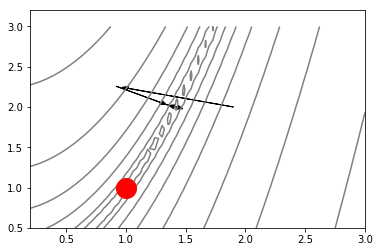

In [25]:
xx = np.linspace(-3, 3, 100)
yy = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(xx, yy)
Z = f2(X, Y)

plt.contour(X, Y, Z, colors="gray", levels=[0.7, 3, 15, 50, 150, 500, 1500, 5000])
plt.plot(1, 1, 'ro', markersize=20)

# step size
mu = 8e-4
s = 0.9  # for arrowr head drawing

# k = 1
x = 1.9
y = 2
g = f2g(x, y)
print("x = {}, g = {}".format((x,y), g))
plt.arrow(x, y, -s * mu * g[0], -s * mu * g[1], head_width=0.05, head_length=0.05, fc='k', ec='k')

# k = 2
x = x - mu * g[0]
y = y - mu * g[1]
g = f2g(x, y)
print("x = {}, g = {}".format((x,y), g))
plt.arrow(x, y, -s * mu * g[0], -s * mu * g[1], head_width=0.05, head_length=0.05, fc='k', ec='k')

# k = 3
x = x - mu * g[0]
y = y - mu * g[1]
g = f2g(x, y)
print("x = {}, g = {}".format((x,y), g))
plt.arrow(x, y, -s * mu * g[0], -s * mu * g[1], head_width=0.05, head_length=0.05, fc='k', ec='k')

# k = 4
x = x - mu * g[0]
y = y - mu * g[1]
g = f2g(x, y)
print("x = {}, g = {}".format((x,y), g))
plt.arrow(x, y, -s * mu * g[0], -s * mu * g[1], head_width=0.05, head_length=0.05, fc='k', ec='k')

plt.xlim(0.2, 3)
plt.ylim(0.5, 3.2)

plt.show()

곡면의 모양이 valley(계곡) 이 되는 경우 수렴하기 힘들 수 있다. 

## 2차 도함수를 사용한 방법

* CG(conjugated gradient) 방법
* BFGS(Broyden–Fletcher–Goldfarb–Shanno) 방법

## SciPy를 이용한 최적화

SciPy의 optimize 서브 패키지는 최적화 명령 minimize 를 제공

세부적인 알고리즘은 method 인수로 선택


In [70]:
import scipy as sp
#from scipy import optimize

result = sp.optimize.minimize(f1, 0)
print(result)
x0 = result['x']
x0

      fun: 2.0
 hess_inv: array([[ 0.5]])
      jac: array([ 0.])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([ 1.99999999])


array([ 1.99999999])

다변수 함수를 최적화

목적 함수가 벡터 인수 (-2, -2) 를 가져야 한다.

In [71]:
def f2(x):
    return (1 - x[0])**2 + 100.0 * (x[1] - x[0]**2)**2

In [72]:
result = sp.optimize.minimize(f2, (-2, -2))
print(result)
x0 = result['x']
x0

      fun: 5.2112890141803265e-12
 hess_inv: array([[ 0.49938636,  0.99860874],
       [ 0.99860874,  2.00187364]])
      jac: array([  7.32138760e-05,  -3.35902622e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 536
      nit: 55
     njev: 131
   status: 2
  success: False
        x: array([ 0.99999854,  0.9999969 ])


array([ 0.99999854,  0.9999969 ])

## 전역 최적화 문제
최적화 하려는 함수가 복수의 국소 최저점(local minima) 인 경우 <br>
초기 추정값 및 알고리즘, 파라미터 등에 의존

그래프에 골이 존재해 골에서 미분값이 0이 나오는 구간들 중에 글로벌한 최소값 찾기 

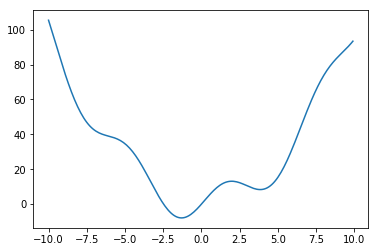

In [73]:
def f_global(x):
    return x**2 + 10 * np.sin(x)

x = np.arange(-10, 10, 0.1)
plt.plot(x, f_global(x));
plt.show()

In [74]:
result = sp.optimize.minimize(f_global, 4)
print(result)
x0 = result['x']
x0

      fun: 8.315585579478032
 hess_inv: array([[ 0.118692]])
      jac: array([  3.09944153e-06])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([ 3.83746748])


array([ 3.83746748])

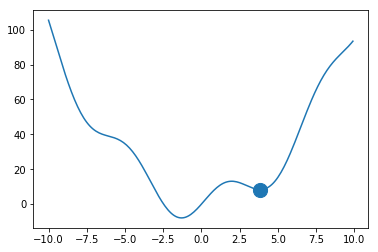

In [75]:
plt.plot(x, f_global(x));
plt.scatter(x0, f_global(x0), s=200);
plt.show()

SciPy의 optimize 서브패키지에서는 제한 최적화 문제를 풀기위한 fmin_slsqp 명령을 제공

In [76]:
result = sp.optimize.fmin_slsqp(f_global, 0)
print(result)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -7.945823069290589
            Iterations: 4
            Function evaluations: 14
            Gradient evaluations: 4
[-1.30621071]


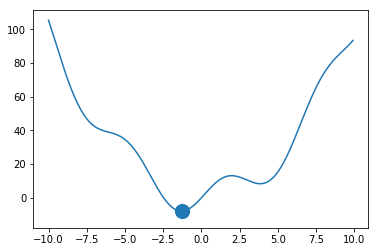

In [77]:
plt.plot(x, f_global(x));
plt.scatter(result, f_global(result), s=200);
plt.show()

# 22절. 제한 조건이 있는 최적화


# 등식 제한 조건이 있는 최적화

라그랑주 승수법(Lagrange multiplier)을 사용하여 최적화 
> 최적화하려 하는 값에 형식적인 라그랑주 승수(Lagrange乘數, 영어: Lagrange multiplier) 항을 더하여, 제약된 문제를 제약이 없는 문제로 바꾼다. <br>
라그랑주 승수법은 어떠한 문제의 최적점을 찾는 것이 아니라, 최적점이 되기 위한 조건을 찾는 방법이다. 즉, 최적해의 필요조건을 찾는 방법이다.




$x^{\ast} = \text{arg} \min_x f(x) ,\,\,\,\ \text{subject to } \;\; g(x)=0$

f 가 아닌 $h = f + \lambda g$ 함수를 최적화 시킴 

SciPy의 optimize 서브패키지에서는 제한 최적화 문제를 풀기위한 fmin_slsqp 명령 제공


In [78]:
def f2logs(x):
    return np.log(x[0]) + np.log(x[1])

def eq_constraint(x):
    return x[0] + x[1] - 1

sp.optimize.fmin_slsqp(f2logs, np.array([1, 1]), eqcons=[eq_constraint])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -1.3862943611198901
            Iterations: 2
            Function evaluations: 8
            Gradient evaluations: 2


array([ 0.5,  0.5])

## 부등식 제한 조건이 있는 최적화

부등식(inequality) 제한 조건이 있는 최소화 문제

$x^{\ast} = \text{arg} \min_x f(x) ,\,\,\,\ \text{subject to } \;\; g(x) \leq 0$

최소점 위치에서의 조건을 변형한 KKT(Karush-Kuhn-Tucker) 조건을 이용하여 최적화
* 최적화 결과에 전혀 영향을 주지 않는 쓸모없는 제한 조건
* 최적화 결과에 영향을 주는 등식 제한 조건



In [79]:
def f(x):
    return np.sqrt((x[0] - 3)**2 + (x[1] - 2)**2)

def ieq_constraint(x):
    return np.atleast_1d(1.5 - np.sum(np.abs(x)))

sp.optimize.fmin_slsqp(f, np.array([0, 0]), ieqcons=[ieq_constraint])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.4748737350428893
            Iterations: 5
            Function evaluations: 20
            Gradient evaluations: 5


array([ 1.25004693,  0.24995307])

...이거 뭐지... ㅠㅠ 